## Emotion Detection Classification

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn import metrics

from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize

In [2]:
path_emotion_file = "isear.csv"

# read csv
df_file = pd.read_csv(path_emotion_file, error_bad_lines=False, warn_bad_lines=False, sep='|', encoding='latin1')

df = df_file[['Field1', 'SIT']]  # Field1 target, SIT feature

In [3]:
# ref: https://scikit-learn.org/stable/modules/feature_extraction.html#customizing-the-vectorizer-classes
class LemmaTokenizer(object):
    def __init__(self):
        self.wnl = WordNetLemmatizer()
    def __call__(self, doc):
        return [self.wnl.lemmatize(t) for t in word_tokenize(doc)]

In [15]:
import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    fig = plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    if normalize:
    	plt.savefig("normalized_confusionSVM.png")
    else:
    	plt.savefig("confusionSVM.png")

### Naive Bayes

In [4]:
train, test = train_test_split(df, test_size=0.3, shuffle=True)

clf = Pipeline([
    ('vect', TfidfVectorizer(ngram_range=(1,2), use_idf=False,tokenizer=LemmaTokenizer())),
    ('clf', MultinomialNB(alpha=0.1)),
])

clf.fit(train.SIT, train.Field1)

predict = clf.predict(test.SIT)

# ref: https://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html#evaluation-of-the-performance-on-the-test-set
nb_prediction = metrics.precision_score(test.Field1, predict, average=None)
print(metrics.classification_report(test.Field1, predict, target_names=df.Field1.unique()))

              precision    recall  f1-score   support

         joy       0.42      0.48      0.45       308
        fear       0.75      0.45      0.56       335
       anger       0.60      0.66      0.63       320
     sadness       0.40      0.55      0.47       302
     disgust       0.64      0.65      0.64       312
       shame       0.65      0.54      0.59       352
       guilt       0.49      0.49      0.49       322

   micro avg       0.55      0.55      0.55      2251
   macro avg       0.56      0.55      0.55      2251
weighted avg       0.57      0.55      0.55      2251



Confusion matrix, without normalization
[[148  13  17  66  13  20  31]
 [ 52 151  38  28  17  19  30]
 [ 18   6 212  31  18  14  21]
 [ 38   7  23 167  11  16  40]
 [ 28   6  16  23 202  26  11]
 [ 31   8  23  35  34 190  31]
 [ 38  11  22  66  21   7 157]]
Normalized confusion matrix
[[0.48 0.04 0.06 0.21 0.04 0.06 0.1 ]
 [0.16 0.45 0.11 0.08 0.05 0.06 0.09]
 [0.06 0.02 0.66 0.1  0.06 0.04 0.07]
 [0.13 0.02 0.08 0.55 0.04 0.05 0.13]
 [0.09 0.02 0.05 0.07 0.65 0.08 0.04]
 [0.09 0.02 0.07 0.1  0.1  0.54 0.09]
 [0.12 0.03 0.07 0.2  0.07 0.02 0.49]]


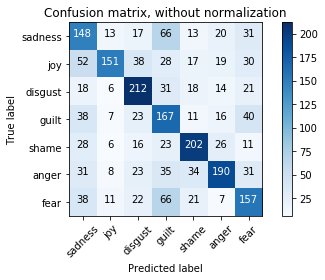

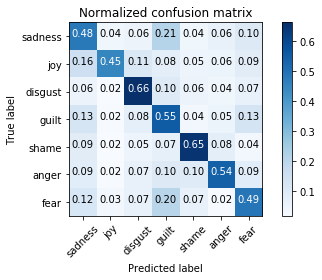

In [10]:
cnf_matrix = confusion_matrix(test.Field1, predict)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(cnf_matrix, classes=test.Field1.unique(),
                      title='Confusion matrix, without normalization')

plot_confusion_matrix(cnf_matrix, classes=test.Field1.unique(), normalize=True,
                      title='Normalized confusion matrix')

### Logistic Regression

In [11]:
train, test = train_test_split(df, test_size=0.3, shuffle=True)

clf = Pipeline([
    ('vect', TfidfVectorizer(ngram_range=(1,1), tokenizer=LemmaTokenizer())),
    ('clf', LogisticRegression()),
])

clf.fit(train.SIT, train.Field1)

predict = clf.predict(test.SIT)

lr_prediction = metrics.precision_score(test.Field1, predict, average=None)
print(metrics.classification_report(test.Field1, predict, target_names=df.Field1.unique()))

D:\Anaconda3\envs\workplace\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda3\envs\workplace\lib\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


              precision    recall  f1-score   support

         joy       0.42      0.55      0.48       299
        fear       0.61      0.61      0.61       304
       anger       0.66      0.69      0.67       327
     sadness       0.55      0.49      0.52       345
     disgust       0.67      0.73      0.70       314
       shame       0.64      0.57      0.60       322
       guilt       0.50      0.42      0.46       340

   micro avg       0.58      0.58      0.58      2251
   macro avg       0.58      0.58      0.58      2251
weighted avg       0.58      0.58      0.58      2251



Confusion matrix, without normalization
[[165  26  23  18  18  19  30]
 [ 48 184  15  19  10   9  19]
 [ 22  16 224  17  14  17  17]
 [ 49  17  26 170  13  24  46]
 [ 20  16  10   9 228  22   9]
 [ 41  11  18  25  24 182  21]
 [ 46  32  22  51  35  11 143]]
Normalized confusion matrix
[[0.55 0.09 0.08 0.06 0.06 0.06 0.1 ]
 [0.16 0.61 0.05 0.06 0.03 0.03 0.06]
 [0.07 0.05 0.69 0.05 0.04 0.05 0.05]
 [0.14 0.05 0.08 0.49 0.04 0.07 0.13]
 [0.06 0.05 0.03 0.03 0.73 0.07 0.03]
 [0.13 0.03 0.06 0.08 0.07 0.57 0.07]
 [0.14 0.09 0.06 0.15 0.1  0.03 0.42]]


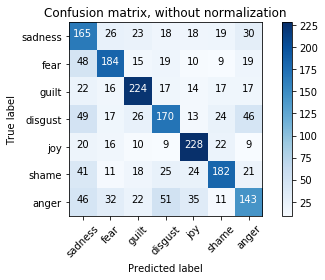

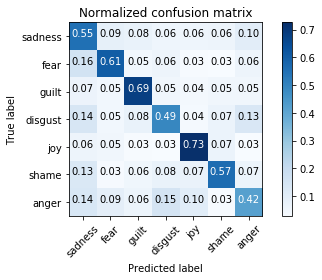

In [13]:
cnf_matrix = confusion_matrix(test.Field1, predict)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(cnf_matrix, classes=test.Field1.unique(),
                      title='Confusion matrix, without normalization')

plot_confusion_matrix(cnf_matrix, classes=test.Field1.unique(), normalize=True,
                      title='Normalized confusion matrix')

### SVM

In [14]:
train, test = train_test_split(df, test_size=0.3, shuffle=True)

clf = Pipeline([
    ('vect', TfidfVectorizer(ngram_range=(1,2), tokenizer=LemmaTokenizer())),
    ('clf', LinearSVC()),
])

clf.fit(train.SIT, train.Field1)

predict = clf.predict(test.SIT)

svm_prediction = metrics.precision_score(test.Field1, predict, average=None)
print(metrics.classification_report(test.Field1, predict, target_names=df.Field1.unique()))

              precision    recall  f1-score   support

         joy       0.45      0.53      0.49       327
        fear       0.62      0.61      0.61       324
       anger       0.71      0.71      0.71       337
     sadness       0.47      0.47      0.47       316
     disgust       0.71      0.75      0.73       306
       shame       0.58      0.56      0.57       311
       guilt       0.53      0.45      0.49       330

   micro avg       0.58      0.58      0.58      2251
   macro avg       0.58      0.58      0.58      2251
weighted avg       0.58      0.58      0.58      2251



Confusion matrix, without normalization
[[173  29  21  33  21  24  26]
 [ 41 197  16  16  17  17  20]
 [ 25  22 239  19   8  11  13]
 [ 52  17  13 147   9  29  49]
 [ 14  13  11   8 228  25   7]
 [ 40  13  19  27  23 173  16]
 [ 36  28  20  66  13  19 148]]
Normalized confusion matrix
[[0.53 0.09 0.06 0.1  0.06 0.07 0.08]
 [0.13 0.61 0.05 0.05 0.05 0.05 0.06]
 [0.07 0.07 0.71 0.06 0.02 0.03 0.04]
 [0.16 0.05 0.04 0.47 0.03 0.09 0.16]
 [0.05 0.04 0.04 0.03 0.75 0.08 0.02]
 [0.13 0.04 0.06 0.09 0.07 0.56 0.05]
 [0.11 0.08 0.06 0.2  0.04 0.06 0.45]]


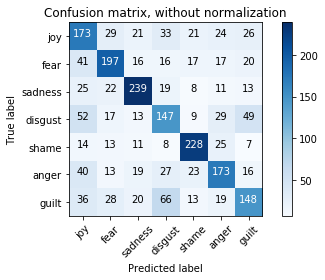

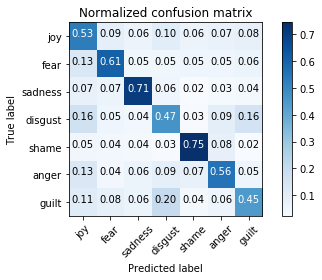

In [16]:
cnf_matrix = confusion_matrix(test.Field1, predict)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(cnf_matrix, classes=test.Field1.unique(),
                      title='Confusion matrix, without normalization')

plot_confusion_matrix(cnf_matrix, classes=test.Field1.unique(), normalize=True,
                      title='Normalized confusion matrix')

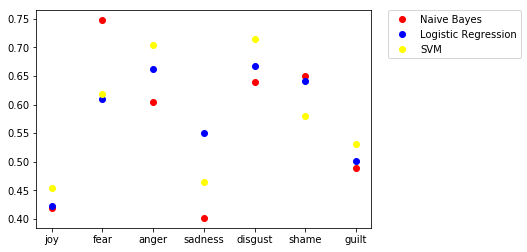

In [17]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

plt.subplot()
plt.plot(df.Field1.unique(), nb_prediction, 'o', color='red', label='Naive Bayes')

plt.subplot()
plt.plot(df.Field1.unique(), lr_prediction, 'o', color='blue', label='Logistic Regression')

plt.subplot()
plt.plot(df.Field1.unique(), svm_prediction, 'o', color='yellow', label='SVM')



plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()